# Credit card case

### Summary - Essential Data Analysis

a) Importing libraries

b) Reading the files

c) Clustering

#### 1. A1

#### 2. A2

#### 3. A3

---

#### a) Importing libraries

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from yellowbrick.cluster import KElbowVisualizer

sys.path.insert(0, '../') # set home directory
from src.features.funcs import *

import warnings
warnings.filterwarnings("ignore")

#### b) Reading the files

In [2]:
df_clean = pd.read_csv('../data/processed/cc_data_clean.csv')
df_clean

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,cash_advance_trx,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,perc_oneoff_purchases,perc_installments_purchases,defaulter
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,0.0,1.0,no
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0,0.0,no
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,1.0,0.0,no
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.0,0.0,no
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0,1.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,...,0,1,500.0,58.644883,43.473717,0.000000,6,1.0,0.0,no
8632,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,0,6,1000.0,325.594462,48.886365,0.500000,6,0.0,1.0,no
8633,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,0,5,1000.0,81.270775,82.418369,0.250000,6,0.0,1.0,no
8634,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,2,0,500.0,52.549959,55.755628,0.250000,6,0.0,0.0,no


#### c) Clustering

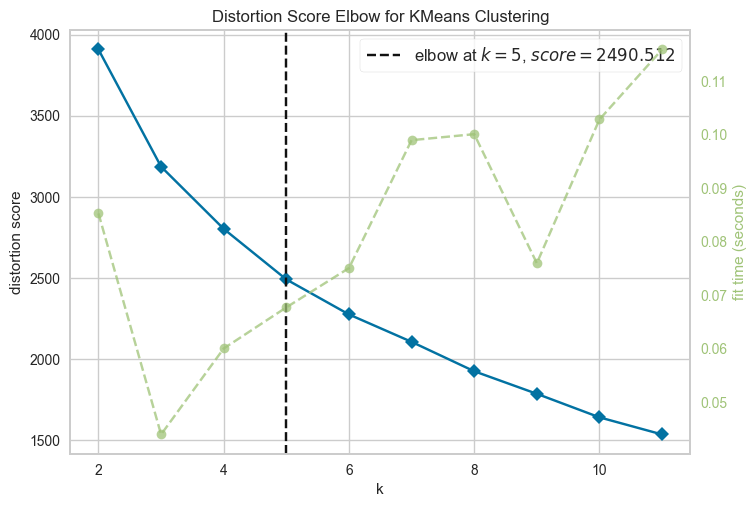

In [3]:
df_norm = pd.read_csv('../data/processed/cc_data_norm.csv')

model_features = ['balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure',
       'perc_oneoff_purchases', 'perc_installments_purchases']

df_cluster = df_norm[model_features].copy()

# Discovering the best K
visualizer = KElbowVisualizer(KMeans(), k=(2, 12), metric='distortion')
visualizer.fit(df_cluster)

visualizer.show()

best_k = int(visualizer.elbow_value_)

In [4]:
# Applying clustering
kmeans = KMeans(n_clusters = best_k,max_iter = 300).fit(df_cluster)
df_cluster = pd.concat([df_norm[['cust_id']],
    pd.Series(kmeans.labels_, name="cluster")],axis=1)

In [5]:
# Merge df_clean + df_cluster
df_join = df_clean.merge(df_cluster, how='left', on='cust_id')
df_join

,cust_id,balance,balance_frequency,purchases,oneoff_purchases,installments_purchases,cash_advance,purchases_frequency,oneoff_purchases_frequency,purchases_installments_frequency,...,purchases_trx,credit_limit,payments,minimum_payments,prc_full_payment,tenure,perc_oneoff_purchases,perc_installments_purchases,defaulter,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,0.0,1.0,no,0.0
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.0,0.0,no,0.0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,...,12,7500.0,622.066742,627.284787,0.000000,12,1.0,0.0,no,2.0
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,...,1,1200.0,678.334763,244.791237,0.000000,12,1.0,0.0,no,4.0
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,...,8,1800.0,1400.057770,2407.246035,0.000000,12,0.0,1.0,no,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,...,1,500.0,58.644883,43.473717,0.000000,6,1.0,0.0,no,4.0
8632,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,...,6,1000.0,325.594462,48.886365,0.500000,6,0.0,1.0,no,3.0
8633,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,...,5,1000.0,81.270775,82.418369,0.250000,6,0.0,1.0,no,1.0
8634,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,...,0,500.0,52.549959,55.755628,0.250000,6,0.0,0.0,no,0.0


### 1. Defaulting customers by cluster

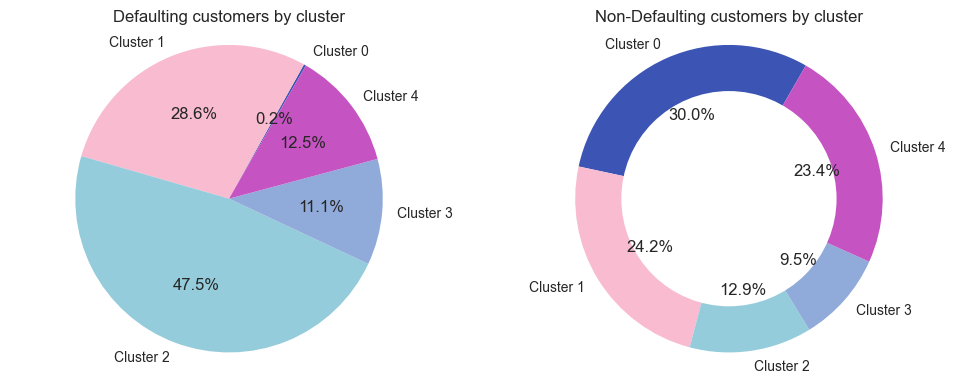

In [6]:
df_def_plot = df_join[df_join.defaulter == 'yes'].groupby('cluster')['defaulter'].count().reset_index()
df_no_def_plot = df_join[df_join.defaulter == 'no'].groupby('cluster')['defaulter'].count().reset_index()

labels = 'Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4'
colors = ['#3C54B4', '#F8BBD0', '#94CCDB', '#90ABDA', '#C653C2']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig1 = plt.gcf()
fig2 = plt.gcf()

ax1.pie(list(df_def_plot.defaulter), labels=labels, colors=colors, 
        autopct='%1.1f%%',startangle=60)
ax1.set_title('Defaulting customers by cluster')
fig1.gca().add_artist(centre_circle)

ax2.pie(list(df_no_def_plot.defaulter), labels=labels, colors=colors, 
        autopct='%1.1f%%',startangle=60)
ax2.set_title('Non-Defaulting customers by cluster')
fig2.gca().add_artist(centre_circle)

ax1.axis('equal')
ax2.axis('equal')

plt.tight_layout()

plt.show()

#### Insights
- Cluster 1 with practically half of defaulting customers
- Cluster 3 with irrelevant percentage of defaulting customers

### 2. OneOff X Installment purchases for all Customers

In [7]:
# Defaulter Customers
df_def_count = df_join[df_join.defaulter == 'yes'].groupby('cluster')['defaulter'].count().reset_index()
df_def_oneoff = df_join[df_join.defaulter == 'yes'].groupby('cluster')['perc_oneoff_purchases'].mean().reset_index()
df_def_install = df_join[df_join.defaulter == 'yes'].groupby('cluster')['perc_installments_purchases'].mean().reset_index()
df_def_plot = df_def_count.merge(df_def_oneoff.merge(df_def_install, how='left', on='cluster'), how='left', on='cluster')
df_def_plot

,cluster,defaulter,perc_oneoff_purchases,perc_installments_purchases
0,0.0,1,0.000000,1.000000
1,1.0,126,0.242778,0.757222
2,2.0,209,0.759761,0.240239
3,3.0,49,0.196939,0.803061
4,4.0,55,0.970000,0.030000


In [8]:
# Non-defaulter Customers
df_no_def_count = df_join[df_join.defaulter == 'no'].groupby('cluster')['defaulter'].count().reset_index()
df_no_def_oneoff = df_join[df_join.defaulter == 'no'].groupby('cluster')['perc_oneoff_purchases'].mean().reset_index()
df_no_def_install = df_join[df_join.defaulter == 'no'].groupby('cluster')['perc_installments_purchases'].mean().reset_index()
df_no_def_plot = df_no_def_count.merge(df_no_def_oneoff.merge(df_no_def_install, how='left', on='cluster'), how='left', on='cluster')
df_no_def_plot.rename(columns={'defaulter':'non_defaulter'}, inplace=True)
df_no_def_plot

,cluster,non_defaulter,perc_oneoff_purchases,perc_installments_purchases
0,0.0,2456,0.006376,0.193945
1,1.0,1987,0.171636,0.830508
2,2.0,1054,0.781954,0.218046
3,3.0,781,0.082138,0.918361
4,4.0,1916,0.934050,0.066874


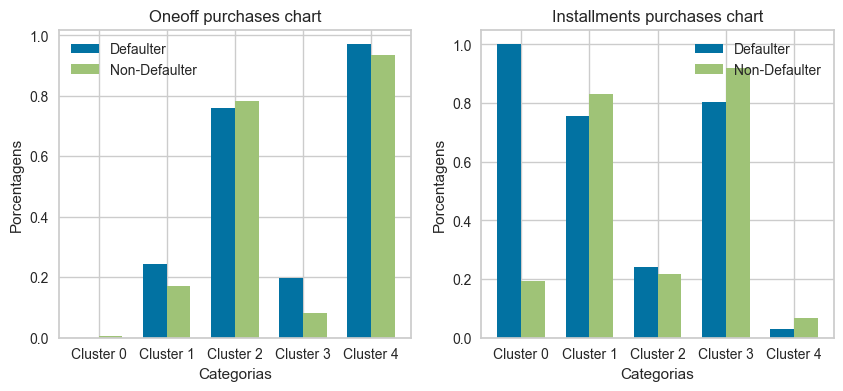

In [9]:
categorias = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Porcentagens do gráfico oneoff purchases
porc_oneoff_defaulter = list(df_def_plot.perc_oneoff_purchases)
porc_oneoff_non_defaulter = list(df_no_def_plot.perc_oneoff_purchases)

# Porcentagens do gráfico installments purchases
porc_install_defaulter = list(df_def_plot.perc_installments_purchases)
porc_install_non_defaulter = list(df_no_def_plot.perc_installments_purchases)

# Definindo a largura das barras
largura_barra = 0.35

# Definindo a posição das barras no eixo x
posicao_grupo1 = range(len(categorias))
posicao_grupo2 = [x + largura_barra for x in posicao_grupo1]


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Barras do gráfico oneoff purchases
ax1.bar(posicao_grupo1, porc_oneoff_defaulter, largura_barra, label='Defaulter')
ax1.bar(posicao_grupo2, porc_oneoff_non_defaulter, largura_barra, label='Non-Defaulter')

# Adicionando rótulos, legendas e título
ax1.set_xlabel('Categorias')
ax1.set_ylabel('Porcentagens')
ax1.set_title('Oneoff purchases chart')
ax1.set_xticks([x + largura_barra/2 for x in posicao_grupo1])
ax1.set_xticklabels(categorias)
ax1.legend()

# Barras do gráfico installments purchases
ax2.bar(posicao_grupo1, porc_install_defaulter, largura_barra, label='Defaulter')
ax2.bar(posicao_grupo2, porc_install_non_defaulter, largura_barra, label='Non-Defaulter')

# Adicionando rótulos, legendas e título
ax2.set_xlabel('Categorias')
ax2.set_ylabel('Porcentagens')
ax2.set_title('Installments purchases chart')
ax2.set_xticks([x + largura_barra/2 for x in posicao_grupo1])
ax2.set_xticklabels(categorias)
ax2.legend()

# Exibindo o gráfico
plt.show()